## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sn

## **Importing data**

In [220]:
mlcase = pd.read_csv('C:/Users/ankit/Documents/ML case Study.csv',header=0)

In [139]:
collegs = pd.read_csv('C:/Users/ankit/Documents/Colleges.csv',header=0)

In [140]:
cities = pd.read_csv('C:/Users/ankit/Documents/cities.csv')

In [205]:
mlcase.describe()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [234]:
mlcase.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Executive,Manager
0,2,non-metro city,Manager,55523.0,3,66,19,71406.58,0,1
1,2,non-metro city,Executive,57081.0,1,84,18,68005.87,1,0
2,3,non-metro city,Executive,60347.0,2,52,28,76764.02,1,0
3,3,non-metro city,Executive,49010.0,2,81,33,82092.39,1,0
4,1,non-metro city,Executive,57879.0,4,74,32,73878.10,1,0


In [197]:
iris=sns.load_dataset("iris")

In [198]:
cities.shape

(17, 3)

In [199]:
mlcase.shape

(1589, 8)

In [200]:
collegs.shape

(28, 3)

## **Creating list**

In [224]:
Tier1=collegs['Tier 1'].tolist()
Tier2=collegs['Tier 2'].tolist()
Tier3=collegs['Tier 3'].tolist()

In [229]:
for item in mlcase.College:
    if item in Tier1:
        mlcase['College'].replace(item,1,inplace=True)
    elif item in Tier2:
        mlcase['College'].replace(item,2,inplace=True)
    elif item in Tier3:
        mlcase['College'].replace(item,3,inplace=True)

In [249]:
mlcase.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Executive,Manager
0,2,non-metro city,Manager,55523.0,3,66,19,71406.58,0,1
1,2,non-metro city,Executive,57081.0,1,84,18,68005.87,1,0
2,3,non-metro city,Executive,60347.0,2,52,28,76764.02,1,0
3,3,non-metro city,Executive,49010.0,2,81,33,82092.39,1,0
4,1,non-metro city,Executive,57879.0,4,74,32,73878.10,1,0
5,2,non-metro city,Executive,54340.0,4,73,31,59950.89,1,0
6,3,metro city,Executive,60298.0,1,42,46,66602.34,1,0
7,2,metro city,Executive,49944.0,2,56,37,57768.44,1,0
8,3,metro city,Executive,53124.0,4,40,37,70083.30,1,0
9,1,non-metro city,Executive,51141.0,1,47,60,85648.48,1,0


## **Creating dummies**

In [227]:
dummy_roles = pd.get_dummies(mlcase['Role'])
mlcase = pd.concat([mlcase, dummy_roles], axis=1)

## **Converting city names in to metro and non metro**

In [225]:
def categorize_City(City):
    if City in ['Mumbai', 'Delhi', 'Kolkata','Chennai','Bangalore','Hyderabad','Ahmedabad','Pune','Surat']:  
        return 'metro city'
    else:
        return 'non-metro city'
mlcase['City'] = mlcase['City'].apply(categorize_City)


In [250]:
mlcase.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Executive,Manager
0,2,non-metro city,Manager,55523.0,3,66,19,71406.58,0,1
1,2,non-metro city,Executive,57081.0,1,84,18,68005.87,1,0
2,3,non-metro city,Executive,60347.0,2,52,28,76764.02,1,0
3,3,non-metro city,Executive,49010.0,2,81,33,82092.39,1,0
4,1,non-metro city,Executive,57879.0,4,74,32,73878.10,1,0
5,2,non-metro city,Executive,54340.0,4,73,31,59950.89,1,0
6,3,metro city,Executive,60298.0,1,42,46,66602.34,1,0
7,2,metro city,Executive,49944.0,2,56,37,57768.44,1,0
8,3,metro city,Executive,53124.0,4,40,37,70083.30,1,0
9,1,non-metro city,Executive,51141.0,1,47,60,85648.48,1,0


In [208]:
mlcase.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


## **Salary Prediction** 

In [1]:
lr=sn.OLS(mlcase['CTC'],x).fit()

NameError: name 'sn' is not defined

In [166]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     158.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.16e-34
Time:                        02:33:19   Log-Likelihood:                -17180.
No. Observations:                1589   AIC:                         3.436e+04
Df Residuals:                    1587   BIC:                         3.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.486e+04    886.559     73.164      0.000    6.31e+04    6.66e+04
EXP (Month)   268.6413     21.356     12.579      0.000     226.753     310.530
==============================================================================
Omnibus:                      313.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.318
Skew:                           1.256   Prob(JB):                    4.69e-118
Kurtosis:                       4.361   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
from sklearn.linear_model import LinearRegression

In [246]:
y=mlcase['CTC']

In [247]:
x=mlcase[['Graduation Marks']]

In [173]:
lr2=LinearRegression()

In [176]:
lr2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [248]:
lr2.predict(x)

array([75325.05651336, 75242.3840651 , 75389.35730645, ...,
       75352.61399612, 75320.46359957, 75283.72028923])

In [180]:
lr2.predict(x)

array([75325.05651336, 75242.3840651 , 75389.35730645, ...,
       75352.61399612, 75320.46359957, 75283.72028923])

In [243]:
import statsmodels.api as sn

In [245]:
x=sn.add_constant(mlcase['EXP (Month)'])

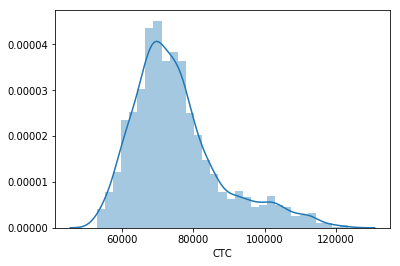

In [244]:
sns.distplot(mlcase.CTC,)

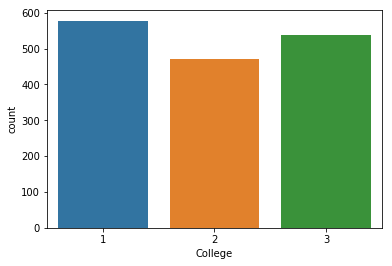

In [240]:
sns.countplot(x='College',data=mlcase)

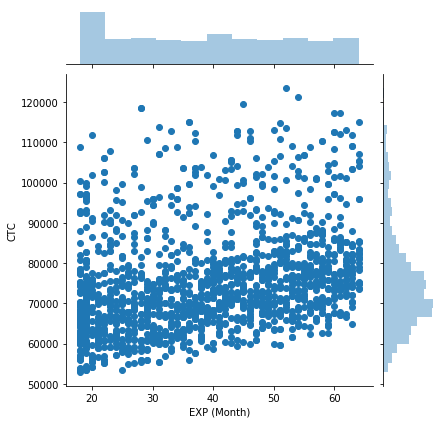

In [241]:
sns.jointplot(x='EXP (Month)',y= 'CTC',data=mlcase)

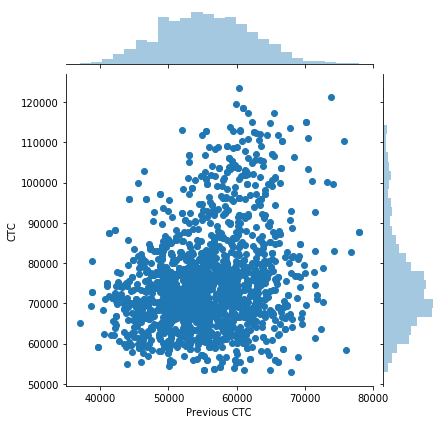

In [242]:
sns.jointplot(x='Previous CTC',y= 'CTC',data=mlcase)

## 1. **Problem statment**

## Here are some main points and perspectives regarding the problem statement from my point of view:

* Features Selection
* Data Quality
* Evaluation Metrics
* Continuous Improvement

## 2. What will be your approach to solving this task?


### Here's a general outline of the steps i take:

* Data Collection
* Understanding the Problem
* EDA
* Data Splitting:
* Model Evaluation
* Continuous Improvement

## 3. What were the available ML model options you had to perform this task?


* Linear Regression
* PLOTS

## 4 .Which model’s performance is best 


* Linear Regression:

* Advantages: Simple, interpretable, and fast.
* Limitations: Assumes a linear relationship, which may not capture complex patterns.

## 5. these steps i can take to improve this selected model’s performance even further?

* Data Cleaning

1.Handle Outliers
2.Address Missing Values

* Model Interpretability 
* Normalization or Scaling: